In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yfin
yfin.pdr_override()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def fetch_data(symbols, start_str, end_str):
    result = []
    # set date string format
    date_format = "%Y-%m-%d"
    # get start time and end time
    start_date = datetime.strptime(start_str, date_format)
    end_date = datetime.strptime(end_str, date_format)
    for symbol in symbols:
        print(f'Now fetching {symbol} data from Yahoo...')
        # get data from Yahoo finance
        data = pdr.get_data_yahoo(symbol, start = start_date, end = end_date)
        print(f'{symbol} data fetched successfully.')
        # add data to result
        result.append(data)
    return result

In [ ]:
symbols = ['AMZN','MSFT', 'QQQ']
start = "2013-01-01"
end = "2023-12-01"
result = fetch_data(symbols, start, end)

Now fetching AMZN data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
AMZN data fetched successfully.
Now fetching MSFT data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
MSFT data fetched successfully.
Now fetching QQQ data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
QQQ data fetched successfully.


In [ ]:
# align data
def get_adj_close(df):
  return df[['Adj Close']]

In [ ]:
result[0].head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000
2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000
2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000
2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000
2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000
2013-01-09,13.4085,13.4750,13.2700,13.3175,13.3175,45312000
2013-01-10,13.4270,13.4370,13.1150,13.2670,13.2670,57268000
2013-01-11,13.2550,13.4215,13.2055,13.3970,13.3970,48266000
2013-01-14,13.4000,13.7130,13.3770,13.6365,13.6365,85500000


In [ ]:
def get_merged_df(result=result):
  # only keep 'Adj Close'
  result_ac = [get_adj_close(x) for x in result]
  # change columns name
  for i in range(len(result_ac)):
    result_ac[i].columns =[symbols[i]]
  # merge into one dataframe
  merged_df = pd.concat(result_ac, axis=1)
  # print(f'original shape\t\t{merged_df.shape}')
  # drop NA rows, in case some stock did not trade on some day
  merged_df.dropna(inplace=True)
  # print(f'shape after drop N.A.\t{merged_df.shape}')
  return merged_df

In [ ]:
merged_df = get_merged_df()
merged_df.head()

original shape		(2748, 3)
shape after drop N.A.	(2748, 3)


,AMZN,MSFT,QQQ
Date,,,
2013-01-02,12.8655,22.574520,60.934296
2013-01-03,12.9240,22.272108,60.616928
2013-01-04,12.9575,21.855276,60.417446
2013-01-07,13.4230,21.814402,60.435596
2013-01-08,13.3190,21.699984,60.317707


In [ ]:
# get daily change rate
change = merged_df.shift(-1)/merged_df
# drop na rows
change.dropna(inplace=True)
# shape of current df
print(f'current shape:\t{change.shape}')
change.head(10)

current shape:	(2747, 3)


,AMZN,MSFT,QQQ
Date,,,
2013-01-02,1.004547,0.986604,0.994792
2013-01-03,1.002592,0.981285,0.996709
2013-01-04,1.035925,0.998130,1.000300
2013-01-07,0.992252,0.994755,0.998049
2013-01-08,0.999887,1.005650,1.003758
2013-01-09,0.996208,0.991011,1.005991
2013-01-10,1.009799,1.013984,1.001340
2013-01-11,1.017877,1.002236,0.995540
2013-01-14,0.996957,1.011900,0.995072


In [ ]:
change['AMZN_DIFF_QQQ'] = change['AMZN'] - change['QQQ']
change['MSFT_DIFF_QQQ'] = change['MSFT'] - change['QQQ']
AMZN_DIFF_QQQ = change['AMZN_DIFF_QQQ'].values.reshape(-1,1)
MSFT_DIFF_QQQ = change['MSFT_DIFF_QQQ'].values.reshape(-1,1)
change.head(10)

,AMZN,MSFT,QQQ,AMZN_DIFF_QQQ,MSFT_DIFF_QQQ
Date,,,,,
2013-01-02,1.004547,0.986604,0.994792,0.009755,-0.008188
2013-01-03,1.002592,0.981285,0.996709,0.005883,-0.015425
2013-01-04,1.035925,0.998130,1.000300,0.035625,-0.002171
2013-01-07,0.992252,0.994755,0.998049,-0.005797,-0.003294
2013-01-08,0.999887,1.005650,1.003758,-0.003871,0.001892
2013-01-09,0.996208,0.991011,1.005991,-0.009783,-0.014980
2013-01-10,1.009799,1.013984,1.001340,0.008459,0.012644
2013-01-11,1.017877,1.002236,0.995540,0.022337,0.006696
2013-01-14,0.996957,1.011900,0.995072,0.001885,0.016829


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# use look_back days price to do the forecast
look_back = 3
# forecast next 10 days price
next_days = 1

In [ ]:
def get_shifted_y(arr, look_back = look_back, next_days = next_days):
    # for example, if we want to use today's price to predict next one day price
    # then look_back = 1, next_days = 1, so the first row of shifted data (in ascending date)
    # should be the second row of original data, means the shifted data shoulbe be arr[1:]
  return arr[look_back + next_days - 1:]

def get_shifted_x(arr, look_back = look_back, next_days = next_days):
   # the total length of new x should be original length - (look_back + next_days - 1)
   # for example, if we want to use today's data to predict next one day's price,
   # the length of new x should be oritinal length - (1 + 1 -1)
   new_len = len(arr) - (look_back + next_days - 1)
   # we need to get a list of history price with length = look_back to forcast the next_days price
   # the first column of the history price should be start at first row of original data and
   # end at new_len - 1
   all_columns = []
   for i in range(look_back):
       current_column = arr[i:i+new_len]
       all_columns.append(current_column)
   new_x = np.stack(all_columns, axis = 1)
   return new_x

In [ ]:
X_AMZN = get_shifted_x(AMZN_DIFF_QQQ)
Y_AMZN = get_shifted_y(AMZN_DIFF_QQQ)
X_MSFT = get_shifted_x(MSFT_DIFF_QQQ)
Y_MSFT = get_shifted_y(MSFT_DIFF_QQQ)

In [ ]:
def get_train_val(x, y):
  # get data size
  data_size = len(x)
  # split the data into training and validation
  split = data_size - 200 # only use recent 200 price for validation
  Xtrain = tf.convert_to_tensor(x[:split], dtype=tf.float32)
  ytrain = tf.convert_to_tensor(y[:split], dtype=tf.float32)
  Xval = tf.convert_to_tensor(x[split:], dtype=tf.float32)
  yval = tf.convert_to_tensor(y[split:], dtype=tf.float32)

  return Xtrain, ytrain, Xval, yval

In [ ]:
# train model using X_ONE
X_AMZN_train, y_AMZN_train, X_AMZN_val, y_AMZN_val = get_train_val(X_AMZN, Y_AMZN)
X_AMZN_train.shape, y_AMZN_train.shape, X_AMZN_val.shape, y_AMZN_val.shape

(TensorShape([2544, 3, 1]),
 TensorShape([2544, 1]),
 TensorShape([200, 3, 1]),
 TensorShape([200, 1]))

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import GRU, SimpleRNN, LSTM, Activation, Dropout, Dense, Reshape, Conv1D, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import mean_squared_error

In [ ]:
def get_model():
  model = Sequential()
  model.add(GRU(128, input_shape=(look_back, 1), return_sequences=False))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.001))
  return model

In [ ]:
model_AMZN = get_model()

In [ ]:
# define a helper function
def train_model(model, X, y, epochs = 20, batch_size = 32, verbose = 2):
  model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=0)
train_model(model_AMZN, X_AMZN_train, y_AMZN_train)

Epoch 1/20
80/80 - 2s - loss: 2.2848e-04 - 2s/epoch - 23ms/step
Epoch 2/20
80/80 - 0s - loss: 2.1200e-04 - 236ms/epoch - 3ms/step
Epoch 3/20
80/80 - 0s - loss: 2.0756e-04 - 228ms/epoch - 3ms/step
Epoch 4/20
80/80 - 0s - loss: 2.1172e-04 - 231ms/epoch - 3ms/step
Epoch 5/20
80/80 - 0s - loss: 2.0910e-04 - 259ms/epoch - 3ms/step
Epoch 6/20
80/80 - 0s - loss: 2.0679e-04 - 249ms/epoch - 3ms/step
Epoch 7/20
80/80 - 0s - loss: 2.0799e-04 - 245ms/epoch - 3ms/step
Epoch 8/20
80/80 - 0s - loss: 2.0904e-04 - 242ms/epoch - 3ms/step
Epoch 9/20
80/80 - 0s - loss: 2.0639e-04 - 253ms/epoch - 3ms/step
Epoch 10/20
80/80 - 0s - loss: 2.0526e-04 - 236ms/epoch - 3ms/step
Epoch 11/20
80/80 - 0s - loss: 2.0978e-04 - 251ms/epoch - 3ms/step
Epoch 12/20
80/80 - 0s - loss: 2.0616e-04 - 250ms/epoch - 3ms/step
Epoch 13/20
80/80 - 0s - loss: 2.0541e-04 - 250ms/epoch - 3ms/step
Epoch 14/20
80/80 - 0s - loss: 2.0923e-04 - 233ms/epoch - 3ms/step
Epoch 15/20
80/80 - 0s - loss: 2.0453e-04 - 229ms/epoch - 3ms/step
Epoch 

In [ ]:
# create a evaluation function
def get_model_perf(model, X, y):
  pred = model.predict(X)
  rmse = np.sqrt(np.mean((pred - y)**2))
  print('RMSE: %.3f\n' % (rmse))
  # relative_err = np.mean((pred-y)/y)
  # print(f'Relative Error: {relative_err*100:.2f}%')
  return pred, rmse

In [ ]:
# show RMSE and relative error value on validation data
pred_AMZN, RMSE_AMZN = get_model_perf(model_AMZN, X_AMZN_val, y_AMZN_val)

7/7 [==============================] - 0s 3ms/step
RMSE: 0.014



In [ ]:
result_AMZN = pd.DataFrame({'AMZN_pred':pred_AMZN.reshape(-1), 'AMZN_actual': y_AMZN_val.numpy().reshape(-1)})
result_AMZN.head(20)

,AMZN_pred,AMZN_actual
0,0.000071,0.006983
1,0.000193,-0.010991
2,0.000030,-0.002623
3,0.000158,-0.003280
4,0.000130,0.012045
5,0.000218,-0.008421
6,0.000017,-0.007468
7,0.000110,-0.004380
8,0.000146,0.006306
9,0.000194,-0.013822


In [ ]:
# save model
model_AMZN.save('/content/drive/MyDrive/NN/forecast_price/model_AMZN')

In [ ]:
model_MSFT = get_model()

In [ ]:
# prepare train and validation data
X_MSFT_train, y_MSFT_train, X_MSFT_val, y_MSFT_val = get_train_val(X_MSFT, Y_MSFT)
X_MSFT_train.shape, y_MSFT_train.shape, X_MSFT_val.shape, y_MSFT_val.shape

(TensorShape([2544, 3, 1]),
 TensorShape([2544, 1]),
 TensorShape([200, 3, 1]),
 TensorShape([200, 1]))

In [ ]:
train_model(model_MSFT, X_MSFT_train, y_MSFT_train)

Epoch 1/20
80/80 - 2s - loss: 1.0310e-04 - 2s/epoch - 21ms/step
Epoch 2/20
80/80 - 0s - loss: 9.5963e-05 - 253ms/epoch - 3ms/step
Epoch 3/20
80/80 - 0s - loss: 9.4932e-05 - 370ms/epoch - 5ms/step
Epoch 4/20
80/80 - 1s - loss: 9.0361e-05 - 508ms/epoch - 6ms/step
Epoch 5/20
80/80 - 1s - loss: 9.1529e-05 - 528ms/epoch - 7ms/step
Epoch 6/20
80/80 - 0s - loss: 9.0021e-05 - 459ms/epoch - 6ms/step
Epoch 7/20
80/80 - 0s - loss: 9.1700e-05 - 275ms/epoch - 3ms/step
Epoch 8/20
80/80 - 0s - loss: 9.1705e-05 - 281ms/epoch - 4ms/step
Epoch 9/20
80/80 - 0s - loss: 9.0919e-05 - 282ms/epoch - 4ms/step
Epoch 10/20
80/80 - 0s - loss: 8.9093e-05 - 264ms/epoch - 3ms/step
Epoch 11/20
80/80 - 0s - loss: 8.9963e-05 - 249ms/epoch - 3ms/step
Epoch 12/20
80/80 - 0s - loss: 9.0487e-05 - 248ms/epoch - 3ms/step
Epoch 13/20
80/80 - 0s - loss: 8.9388e-05 - 244ms/epoch - 3ms/step
Epoch 14/20
80/80 - 0s - loss: 8.9307e-05 - 243ms/epoch - 3ms/step
Epoch 15/20
80/80 - 0s - loss: 9.0125e-05 - 250ms/epoch - 3ms/step
Epoch 

In [ ]:
# show RMSE and relative error value on validation data
pred_MSFT, RMSE_MSFT = get_model_perf(model_MSFT, X_MSFT_val, y_MSFT_val)

7/7 [==============================] - 0s 5ms/step
RMSE: 0.010



In [ ]:
model_MSFT.save('/content/drive/MyDrive/NN/forecast_price/model_MSFT')

In [ ]:
result_MSFT = pd.DataFrame({'MSFT_pred':pred_MSFT.reshape(-1), 'MSFT_actual': y_MSFT_val.numpy().reshape(-1)})
result_MSFT.head(20)

,MSFT_pred,MSFT_actual
0,-0.000879,-0.015654
1,-0.000576,-0.007858
2,-0.000751,-0.008546
3,-0.000717,0.002788
4,-0.001039,-0.005339
5,-0.000822,0.004228
6,-0.001097,-0.005040
7,-0.000836,-0.003389
8,-0.000892,-0.001665
9,-0.000925,-0.004590


In [ ]:
merged_result = pd.concat([result_AMZN, result_MSFT], axis=1)
merged_result.head(20)

,AMZN_pred,AMZN_actual,MSFT_pred,MSFT_actual
0,0.000071,0.006983,-0.000879,-0.015654
1,0.000193,-0.010991,-0.000576,-0.007858
2,0.000030,-0.002623,-0.000751,-0.008546
3,0.000158,-0.003280,-0.000717,0.002788
4,0.000130,0.012045,-0.001039,-0.005339
5,0.000218,-0.008421,-0.000822,0.004228
6,0.000017,-0.007468,-0.001097,-0.005040
7,0.000110,-0.004380,-0.000836,-0.003389
8,0.000146,0.006306,-0.000892,-0.001665
9,0.000194,-0.013822,-0.000925,-0.004590


In [ ]:
AMZN_history_pred = model_AMZN.predict(X_AMZN_train)
MSFT_history_pred = model_MSFT.predict(X_MSFT_train)
# get the mean diff of two history predictions
AMZN_MSFT_diff_mean =  np.mean(AMZN_history_pred - MSFT_history_pred)
AMZN_MSFT_diff_std =  np.std(AMZN_history_pred - MSFT_history_pred)
AMZN_MSFT_diff_mean, AMZN_MSFT_diff_std


80/80 [==============================] - 0s 3ms/step


(0.0011170707, 0.00027511257)

In [ ]:
merged_result['return'] = np.where(merged_result['AMZN_pred'] - merged_result['MSFT_pred'] > AMZN_MSFT_diff_mean, \
                                   merged_result['AMZN_actual'] - merged_result['MSFT_actual'], \
                                   -merged_result['AMZN_actual'] + merged_result['MSFT_actual'],)
merged_result.head(20)

,AMZN_pred,AMZN_actual,MSFT_pred,MSFT_actual,return
0,0.000071,0.006983,-0.000879,-0.015654,-0.022637
1,0.000193,-0.010991,-0.000576,-0.007858,0.003132
2,0.000030,-0.002623,-0.000751,-0.008546,-0.005923
3,0.000158,-0.003280,-0.000717,0.002788,0.006068
4,0.000130,0.012045,-0.001039,-0.005339,0.017384
5,0.000218,-0.008421,-0.000822,0.004228,0.012649
6,0.000017,-0.007468,-0.001097,-0.005040,0.002428
7,0.000110,-0.004380,-0.000836,-0.003389,0.000991
8,0.000146,0.006306,-0.000892,-0.001665,-0.007971
9,0.000194,-0.013822,-0.000925,-0.004590,-0.009232


In [ ]:
# get daiy return
daily_return = merged_result['return'].values
# change daily return to log
log_return = np.log(1 + daily_return)
# sum daily return and convert back from log value
total_return = np.exp(np.sum(log_return))
print(f'total_return is {total_return*100 - 100:.1f}% in {merged_result.shape[0]} trading days.')

total_return is 53.6% in 200 trading days.


In [ ]:
positive_return_count = np.sum(daily_return > 0)
negative_return_count = len(daily_return) - positive_return_count
print(f'Positive return rate is {positive_return_count/len(daily_return):.2f}')
positive_return = [x if x > 0 else 0 for x in daily_return]
print(f'Average positive dailiy is {(np.sum(positive_return)/positive_return_count)*100:.2f}%')
negative_return = [x if x < 0 else 0 for x in daily_return]
print(f'Average negative dailiy is {(np.sum(negative_return)/negative_return_count)*100:.2f}%')


Positive return rate is 0.55
Average positive dailiy is 1.34%
Average negative dailiy is -1.10%


<Axes: >

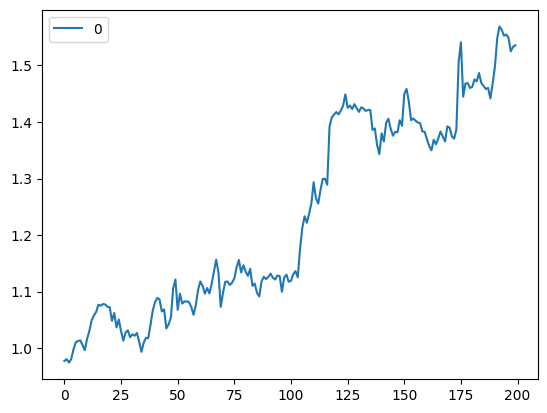

In [ ]:
accumulated_return = np.exp(np.cumsum(log_return))
return_df = pd.DataFrame(accumulated_return)
return_df.plot()

In [ ]:
# run before market open every day
from datetime import date, timedelta
def run_before_open():
  model_MSFT = tf.keras.models.load_model('/content/drive/MyDrive/NN/forecast_price/model_MSFT')
  model_AMZN = tf.keras.models.load_model('/content/drive/MyDrive/NN/forecast_price/model_AMZN')
  # input last 3 days data
  today = date.today()
  ten_days_before = today - timedelta(days=10)
  current_data = fetch_data(symbols, ten_days_before.strftime("%Y-%m-%d"), today.strftime("%Y-%m-%d"))
  merged_df = get_merged_df(current_data)
  # print(merged_df.tail())
  change_df = merged_df.copy()
  change_df['AMZN'] = merged_df['AMZN'] / merged_df['AMZN'].shift(1)
  change_df['MSFT'] = merged_df['MSFT'] / merged_df['MSFT'].shift(1)
  change_df['QQQ'] = merged_df['QQQ'] / merged_df['QQQ'].shift(1)
  change_df.dropna(inplace=True)
  change_df['AMZN_DIFF_QQQ'] = change_df['AMZN'] - change_df['QQQ']
  change_df['MSFT_DIFF_QQQ'] = change_df['MSFT'] - change_df['QQQ']
  # print(change_df.tail())
  AMZN_DIFF_QQQ = change_df['AMZN_DIFF_QQQ'].values.reshape(-1,1)
  MSFT_DIFF_QQQ = change_df['MSFT_DIFF_QQQ'].values.reshape(-1,1)
  AMZN_DIFF_QQQ = AMZN_DIFF_QQQ[-3:].reshape(1,3,1)
  MSFT_DIFF_QQQ = MSFT_DIFF_QQQ[-3:].reshape(1,3,1)
  X_AMZN = tf.convert_to_tensor(AMZN_DIFF_QQQ, dtype=tf.float32)
  X_MSFT = tf.convert_to_tensor(MSFT_DIFF_QQQ, dtype=tf.float32)
  mean_diff = 0.0011170707
  pred_AMZN = model_AMZN.predict(X_AMZN).reshape(-1)
  # print(f'pred_AMZN:\n{pred_AMZN}')
  pred_MSFT = model_MSFT.predict(X_MSFT).reshape(-1)
  print(f'pred_MSFT:\n{pred_MSFT}')
  print(f'pred_AMZN - pred_MSFT > mean_diff is: {pred_AMZN - pred_MSFT > mean_diff}')

  record = pd.DataFrame({'date': today, 'pred_AMZN': pred_AMZN, 'pred_MSFT': pred_MSFT\
                       ,'BUY AMZN/SHORT MSFT': pred_AMZN - pred_MSFT > mean_diff, 'BUY MSFT/SHORT AMZN': pred_AMZN - pred_MSFT < mean_diff\
                       ,'return': 0})
  # show record
  print(record)
  # save record
  record.to_csv('/content/drive/MyDrive/NN/forecast_price/before_open.csv',index=False)


In [ ]:
run_before_open()

Now fetching AMZN data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
AMZN data fetched successfully.
Now fetching MSFT data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
MSFT data fetched successfully.
Now fetching QQQ data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
QQQ data fetched successfully.
1/1 [==============================] - 0s 402ms/step
pred_MSFT:
[-0.00081328]
pred_AMZN - pred_MSFT > mean_diff is: [False]
         date  pred_AMZN  pred_MSFT  BUY AMZN/SHORT MSFT  BUY MSFT/SHORT AMZN  \
0  2023-12-27    0.00011  -0.000813                False                 True   

   return  
0       0  


In [ ]:
def run_after_close():
  record = pd.read_csv('/content/drive/MyDrive/NN/forecast_price/before_open.csv', index_col=False)
  end = date.today() + timedelta(days=1)
  start = date.today() - timedelta(days=1)
  current_data = fetch_data(symbols, start.strftime("%Y-%m-%d"), end.strftime("%Y-%m-%d"))
  merged_df = get_merged_df(current_data)
  print(merged_df)
  AMZN = merged_df['AMZN'].values
  MSFT = merged_df['MSFT'].values
  if record['BUY AMZN/SHORT MSFT'].values[-1]:
    return_rate = AMZN[-1]/AMZN[-2] - MSFT[-1]/MSFT[-2]
  else:
    return_rate = -AMZN[-1]/AMZN[-2] + MSFT[-1]/MSFT[-2]
  print(return_rate)
  # update today's actual return
  record['return'] = [return_rate]
  print(record)
  # append to record file
  record.to_csv('/content/drive/MyDrive/NN/forecast_price/record.csv', mode='a', header= False, index=False)
run_after_close()

Now fetching AMZN data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
AMZN data fetched successfully.
Now fetching MSFT data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
MSFT data fetched successfully.
Now fetching QQQ data from Yahoo...
[*********************100%%**********************]  1 of 1 completed
QQQ data fetched successfully.
                  AMZN        MSFT         QQQ
Date                                          
2023-12-26  153.410004  374.660004  410.880005
2023-12-27  153.339996  374.070007  411.500000
-0.001118410002652892
         date  pred_AMZN  pred_MSFT  BUY AMZN/SHORT MSFT  BUY MSFT/SHORT AMZN  \
0  2023-12-27    0.00011  -0.000813                False                 True   

     return  
0 -0.001118  
